# Task-01

## *Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.*

In [139]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
m.style.use('dark_background')

## Data Overview:-

In [140]:
train=p.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
price=train[['GrLivArea','FullBath','HalfBath','BedroomAbvGr','SalePrice']]
price.head()

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1710,2,1,3,208500
1,1262,2,0,3,181500
2,1786,2,1,3,223500
3,1717,1,0,3,140000
4,2198,2,1,4,250000


###### Required Input Columns according to the question

In [142]:
price.shape

(1460, 5)

###### Total number of Rows=1460 and number of Columns=5

In [143]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   FullBath      1460 non-null   int64
 2   HalfBath      1460 non-null   int64
 3   BedroomAbvGr  1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [144]:
price.describe()

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.565068,0.382877,2.866438,180921.195890
std,525.480383,0.550916,0.502885,0.815778,79442.502883
min,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,1129.500000,1.000000,0.000000,2.000000,129975.000000
50%,1464.000000,2.000000,0.000000,3.000000,163000.000000
75%,1776.750000,2.000000,1.000000,3.000000,214000.000000
max,5642.000000,3.000000,2.000000,8.000000,755000.000000


## Data Analysis:-

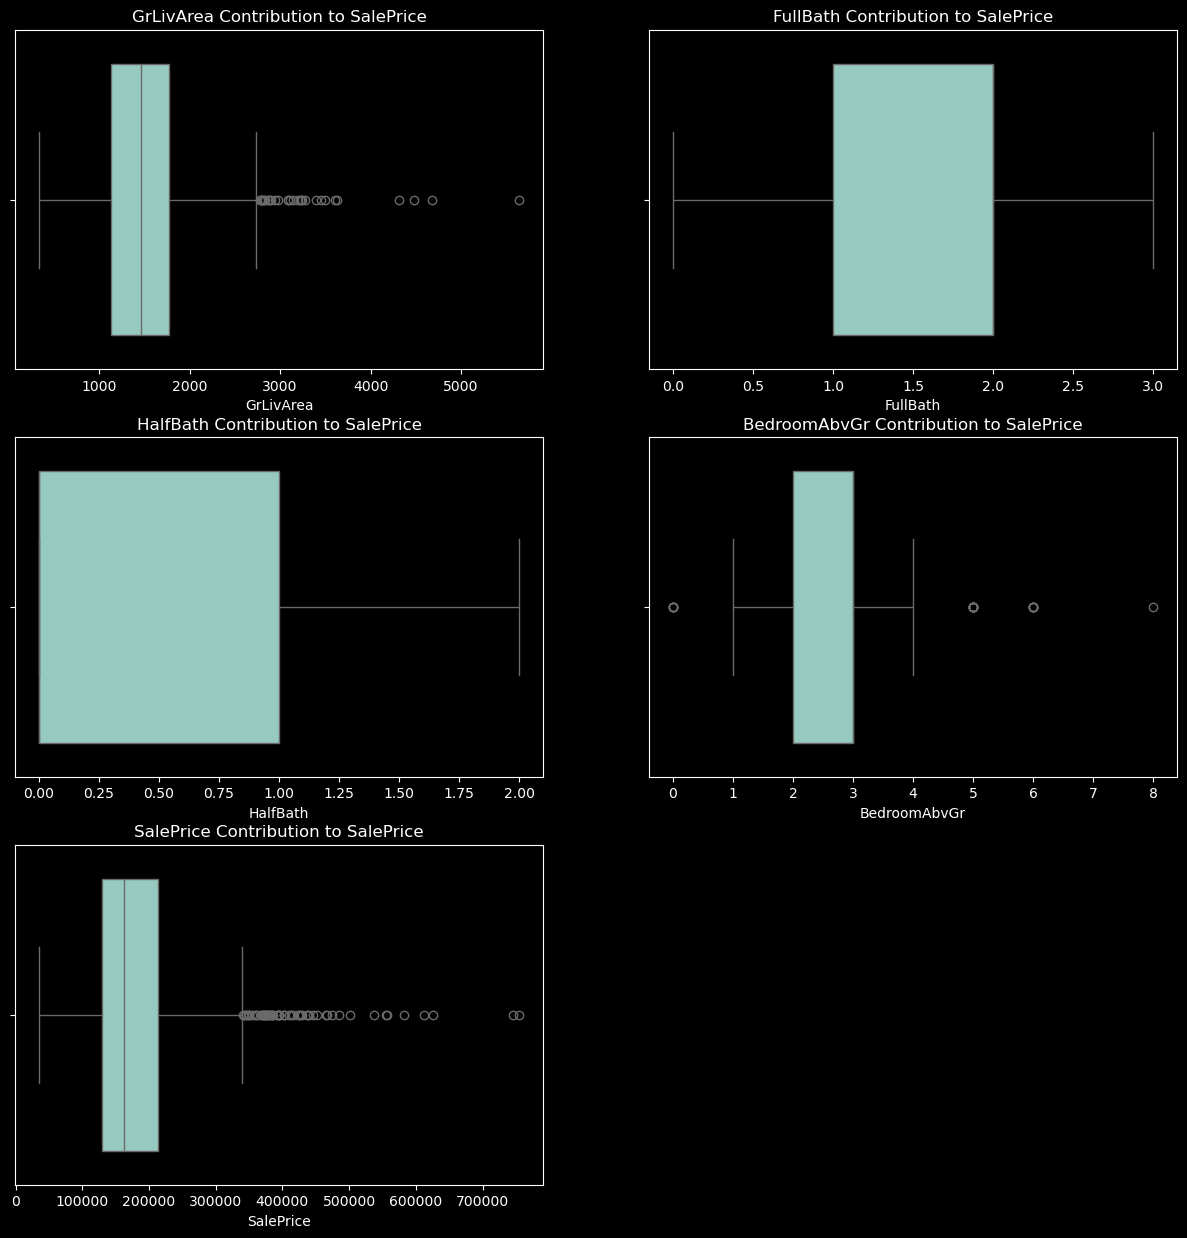

In [145]:
def box_plot(y):
    s.boxplot(data=price,x=y)
m.figure(figsize=(15,15))
for i,j in enumerate(price.columns[:5]):
    m.subplot(3,2,i+1)
    box_plot(j)
    m.title(f"{j} Contribution to SalePrice")
m.show()

<Axes: >

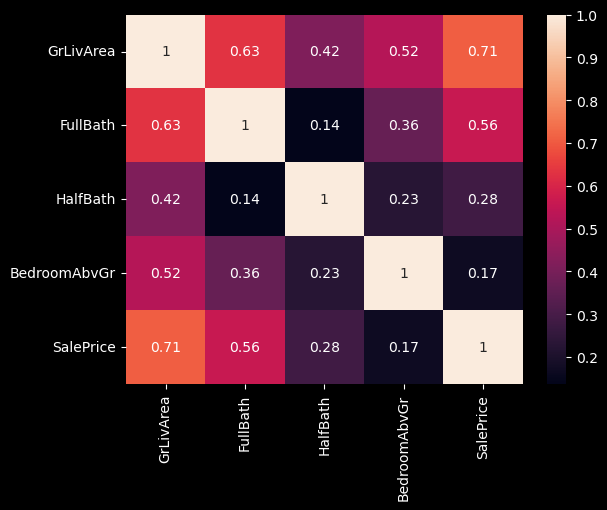

In [146]:
s.heatmap(price.corr(),annot=True)

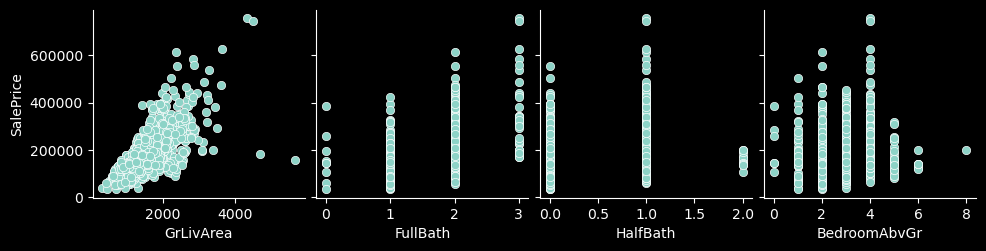

In [147]:
s.pairplot(price,x_vars=['GrLivArea','FullBath','HalfBath','BedroomAbvGr'],y_vars='SalePrice')

## Data Cleaning:-

In [148]:
price.isnull().sum()

GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

###### Since there is no null values so nothing to be cleaned

## Train and Test Data:-

In [149]:
X=price.drop('SalePrice',axis=1)
y=price[['SalePrice']]

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [152]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [153]:
prediction=model.predict(X_test)

In [154]:
from sklearn.metrics import mean_squared_error,r2_score

In [155]:
n.sqrt(mean_squared_error(y_test,prediction))

49411.874445602894

In [156]:
r2_score(y_test,prediction)

0.6363100847626446

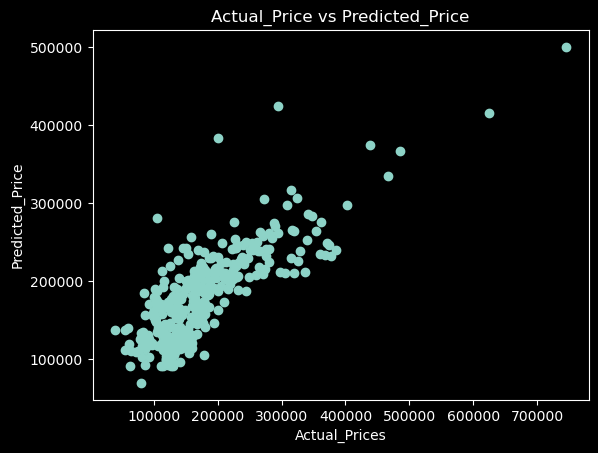

In [157]:
m.scatter(y_test,prediction)
m.xlabel('Actual_Prices')
m.ylabel('Predicted_Price')
m.title('Actual_Price vs Predicted_Price')
m.show()

C:\Users\samee\AppData\Local\Temp\ipykernel_6044\905981506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot((y_test,prediction))


<Axes: ylabel='Density'>

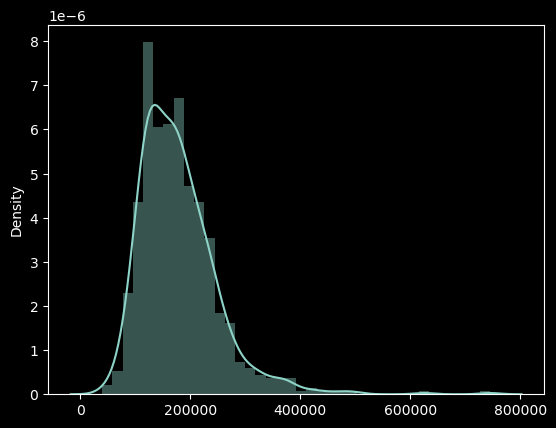

In [158]:
s.distplot((y_test,prediction))

In [159]:
df=p.DataFrame({'GrLivArea':[2000],'FullBath':[2],'HalfBath':[1],'BedroomAbvGr':[2]})
y_pred=model.predict(df)
print("Predicted_Price = ",y_pred)

Predicted_Price =  [[271594.2765091]]
